In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("heart failure - heart failure.csv")

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.shape

(299, 13)

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [17]:
DEATH_EVENT_ = df.DEATH_EVENT.value_counts()
DEATH_EVENT_

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [12]:
import seaborn as sns

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='count'>

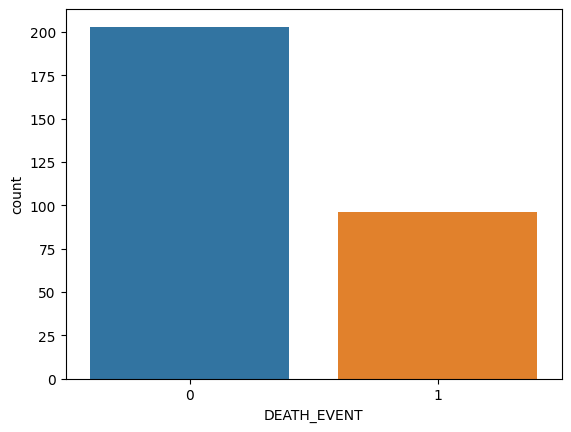

In [13]:
sns.countplot(x=df.DEATH_EVENT)

<AxesSubplot: xlabel='smoking', ylabel='count'>

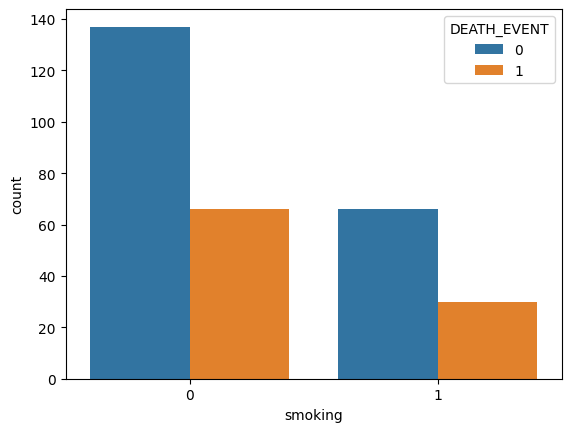

In [22]:
sns.countplot(x=df.smoking , hue= df.DEATH_EVENT)

In [14]:
import plotly.express as px

In [18]:
value = DEATH_EVENT_.values
name =  DEATH_EVENT_.index


In [20]:
px.pie(df,
      values = value,
      names = name,
      hole = .7
      )

In [24]:
x = df.drop('DEATH_EVENT' , axis=1)

In [25]:
y = df[['DEATH_EVENT']]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , random_state=42 , test_size = .20)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtc = DecisionTreeClassifier()

In [30]:
dtc.fit(xtrain , ytrain)

DecisionTreeClassifier()

In [31]:
dtc.score(xtrain,ytrain)

1.0

In [32]:
dtc.score(xtest,ytest)

0.6833333333333333

In [33]:
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score , auc ,RocCurveDisplay , precision_score , roc_curve

In [36]:
con = confusion_matrix(ytest , dtc.predict(xtest))
con

array([[28,  7],
       [12, 13]], dtype=int64)

<AxesSubplot: >

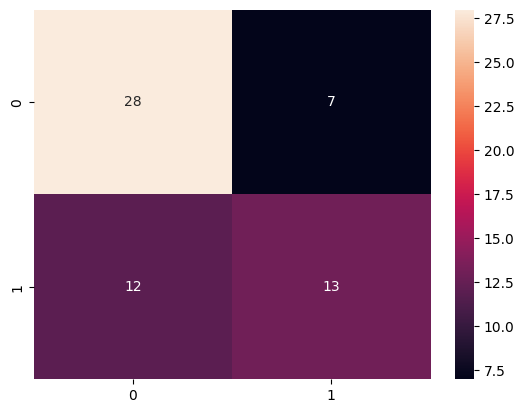

In [37]:
sns.heatmap(con,
           annot=True)

In [40]:
print(classification_report(ytest , dtc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.65      0.52      0.58        25

    accuracy                           0.68        60
   macro avg       0.68      0.66      0.66        60
weighted avg       0.68      0.68      0.68        60



In [43]:
import matplotlib.pyplot as plt

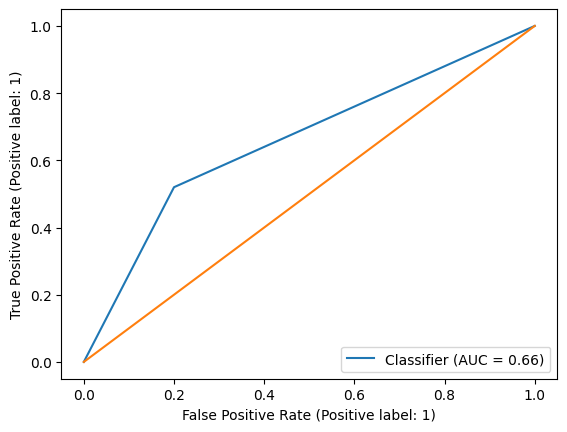

In [44]:
RocCurveDisplay.from_predictions(ytest , dtc.predict(xtest))
plt.plot([0,1],[0,1])